<a href="https://colab.research.google.com/github/Project-Load/LSTM-Univariate-forecasting/blob/main/Set2Success.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import keras
import numpy as np
import tensorflow as tf

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


In [ ]:
# Replace 'YOUR_FOLDER_ID' with the ID of your folder
folder_id = 'databeban_merged.xlsx'

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Set the directory path to your folder
folder_path = '/content/drive/My Drive/Datasets/Set2/' + folder_id

# List the contents of the folder
!ls "$folder_path"


In [ ]:

df = pd.read_excel(folder_path)
df


,datetime,load
0,2018-01-01 00:30:00,554.80
1,2018-01-01 01:00:00,545.80
2,2018-01-01 01:30:00,534.70
3,2018-01-01 02:00:00,521.50
4,2018-01-01 02:30:00,496.50
...,...,...
35035,2019-12-31 22:00:00,807.81
35036,2019-12-31 22:30:00,788.11
35037,2019-12-31 23:00:00,773.05
35038,2019-12-31 23:30:00,753.55


from matplotlib import pyplot as plt
df['load'].plot(kind='hist', bins=20, title='load')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datetime']
  ys = series['load']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('datetime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datetime')
_ = plt.ylabel('load')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['datetime']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'datetime'}, axis=1)
              .sort_values('datetime', ascending=True))
  xs = counted['datetime']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('datetime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datetime')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datetime']
  ys = series['load']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('datetime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datetime')
_ = plt.ylabel('load')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['datetime']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'datetime'}, axis=1)
              .sort_values('datetime', ascending=True))
  xs = counted['datetime']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('datetime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datetime')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
df['load'].plot(kind='line', figsize=(8, 4), title='load')
plt.gca().spines[['top', 'right']].set_visible(False)

ValueError: 'datetime' is both an index level and a column label, which is ambiguous.

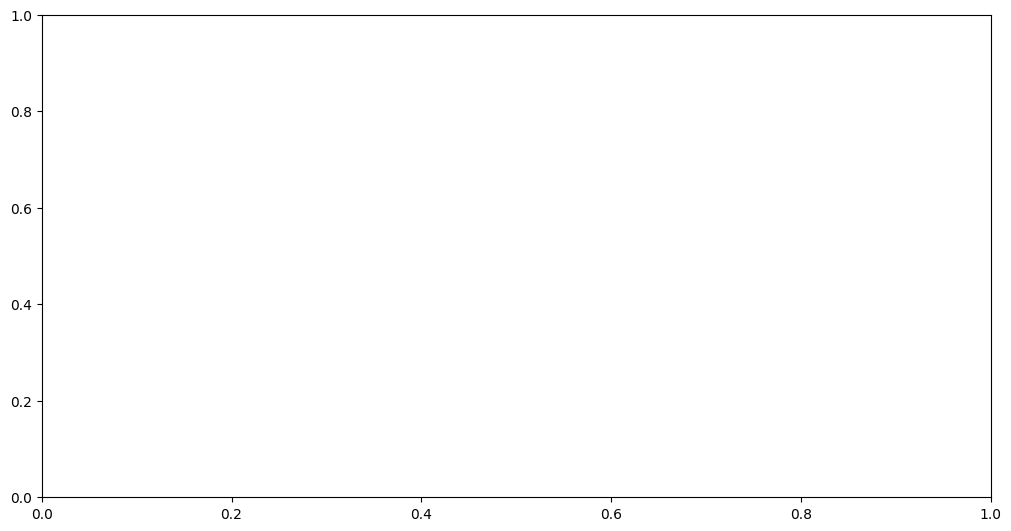

In [99]:
#Not part of the code only for plotting

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datetime']
  ys = series['load']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('datetime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datetime')
_ = plt.ylabel('load')

In [ ]:
df.index = pd.to_datetime(df['datetime'], format='%y-%m-%d %H:%M:%S')
df[:47]

,datetime,load
datetime,,
2018-01-01 00:30:00,2018-01-01 00:30:00,554.80
2018-01-01 01:00:00,2018-01-01 01:00:00,545.80
2018-01-01 01:30:00,2018-01-01 01:30:00,534.70
2018-01-01 02:00:00,2018-01-01 02:00:00,521.50
2018-01-01 02:30:00,2018-01-01 02:30:00,496.50
2018-01-01 03:00:00,2018-01-01 03:00:00,493.30
2018-01-01 03:30:00,2018-01-01 03:30:00,486.00
2018-01-01 04:00:00,2018-01-01 04:00:00,481.40
2018-01-01 04:30:00,2018-01-01 04:30:00,479.50


In [ ]:
load = df['load']
print(df.columns)


Index(['datetime', 'load'], dtype='object')


In [ ]:
#format of taking values
#[[1],[2],[3],[4],[5]] [6]
def df_to_X_y(df, window_size=5):
 df_as_np = df.to_numpy()
 X = []
 y = []
 for i in range(len(df_as_np)-window_size):
  row = [[a] for a in df_as_np[i:i+5]]
  X.append(row)
  label = df_as_np[i+5]
  y.append(label)
 return np.array(X), np.array(y)


In [ ]:
WINDOW_SIZE = 5
X,y = df_to_X_y(load, WINDOW_SIZE)
print(X.shape, y.shape)


(35035, 5, 1) (35035,)


In [ ]:
y

array([493.3 , 486.  , 481.4 , ..., 773.05, 753.55, 726.  ])

In [ ]:
X_train, y_train = X[:30000], y[:30000]
X_val, y_val = X[30000:34000],y[30000:34000]
X_test, y_test = X[34000:], y[34000:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((30000, 5, 1), (30000,), (4000, 5, 1), (4000,), (1035, 5, 1), (1035,))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
import numpy as np

# Reshape X to be 3D (batch_size, timesteps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)


model1 = Sequential()
model1.add(InputLayer(input_shape=(WINDOW_SIZE, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, activation='relu'))
model1.add(Dense(1, activation='linear'))




In [ ]:
cp = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001),metrics=[RootMeanSquaredError()])

In [ ]:
model1.fit(X_train,y_train,validation_data=(X_val,y_val), epochs=10, callbacks=[cp])

Epoch 1/10
938/938 [==============================] - 20s 15ms/step - loss: 373939.5312 - root_mean_squared_error: 611.5060 - val_loss: 316011.3125 - val_root_mean_squared_error: 562.1489
Epoch 2/10
938/938 [==============================] - 10s 11ms/step - loss: 102255.9688 - root_mean_squared_error: 319.7749 - val_loss: 49743.4062 - val_root_mean_squared_error: 223.0323
Epoch 3/10
938/938 [==============================] - 9s 10ms/step - loss: 12282.6201 - root_mean_squared_error: 110.8270 - val_loss: 11996.8496 - val_root_mean_squared_error: 109.5301
Epoch 4/10
938/938 [==============================] - 10s 10ms/step - loss: 1786.9873 - root_mean_squared_error: 42.2728 - val_loss: 3258.1130 - val_root_mean_squared_error: 57.0799
Epoch 5/10
938/938 [==============================] - 10s 11ms/step - loss: 454.7196 - root_mean_squared_error: 21.3242 - val_loss: 1618.5372 - val_root_mean_squared_error: 40.2310
Epoch 6/10
938/938 [==============================] - 9s 9ms/step - loss: 290

In [ ]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [ ]:
train_predictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions,'Actual':y_train})
train_results

938/938 [==============================] - 5s 5ms/step


,Train Predictions,Actual
0,490.708099,493.30
1,494.167816,486.00
2,486.856201,481.40
3,482.142181,479.50
4,481.187897,483.50
...,...,...
29995,587.195251,576.36
29996,566.433655,554.82
29997,546.333191,544.11
29998,541.873718,529.74


In [107]:
print(train_results.columns)


Index(['Train Predictions', 'Actual'], dtype='object')


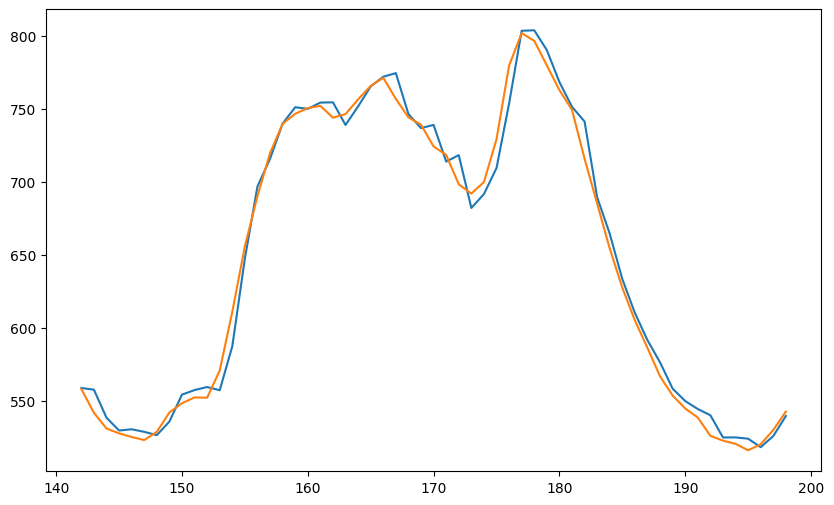

In [114]:
import matplotlib.pyplot as plt

# Create a new figure with the desired figsize
plt.figure(figsize=(10, 6))

# Plot the data
plt.plot(train_results['Train Predictions'][142:199])
plt.plot(train_results['Actual'][142:199])

# Show the plot
plt.show()


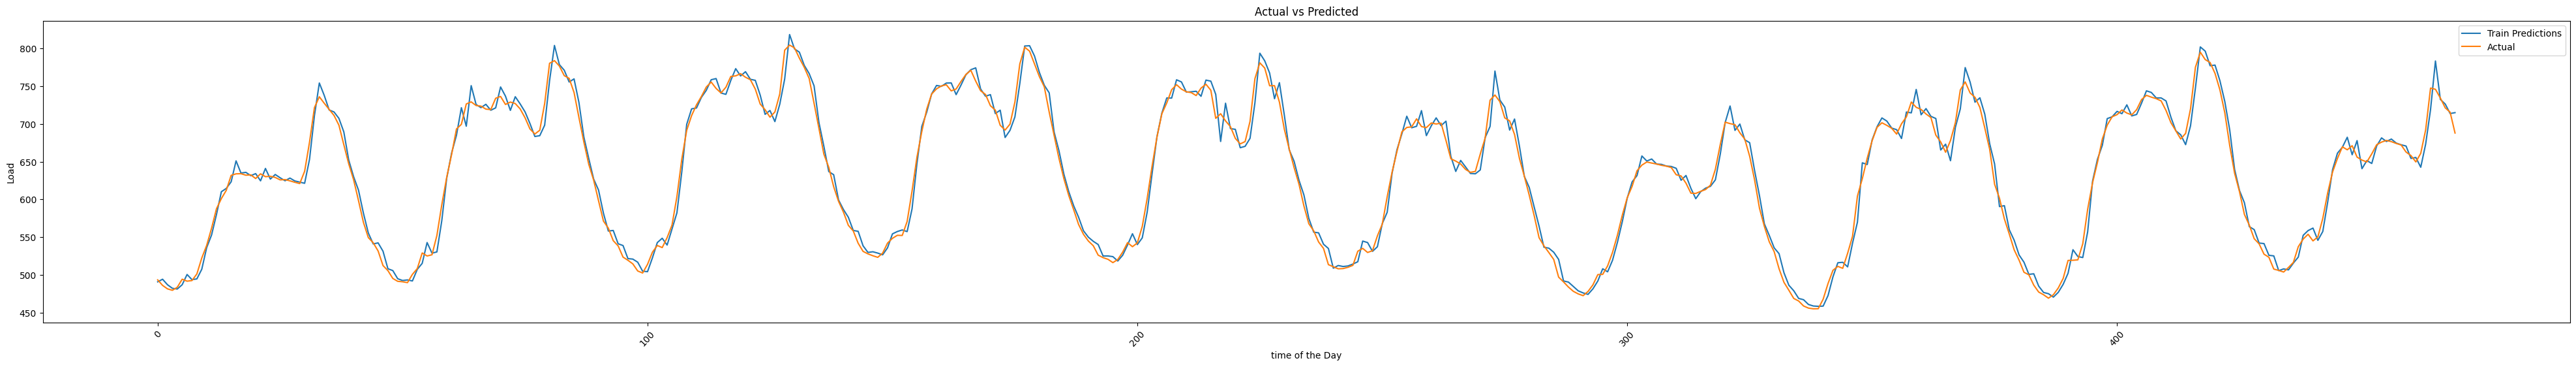

In [112]:
#Trying to label with date and time
import matplotlib.pyplot as plt
import pandas as pd


# Create a new figure with the desired figsize
plt.figure(figsize=(50, 6))

# Plot the data with time and date as x-axis values
plt.plot(train_results.index[:470], train_results['Train Predictions'][:470])
plt.plot(train_results.index[:470], train_results['Actual'][:470])

# Set x-axis labels
plt.xticks(rotation=47)  # Assuming 24 times in a day

# Set plot title and labels
plt.title('Actual vs Predicted')
plt.xlabel('time of the Day')
plt.ylabel('Load')

# Show the plot
plt.legend(['Train Predictions', 'Actual'])
plt.show()


In [ ]:
val_predictions = model1.predict(X_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions,'Actual':y_val})
val_results

125/125 [==============================] - 0s 2ms/step


,Val Predictions,Actual
0,528.704956,517.64
1,518.428467,512.93
2,514.354492,508.66
3,510.569000,510.44
4,514.612488,519.58
...,...,...
3995,763.354736,787.03
3996,806.913391,824.82
3997,824.548401,851.18
3998,836.177795,870.09


from matplotlib import pyplot as plt
val_results['Val Predictions'].plot(kind='hist', bins=20, title='Val Predictions')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
val_results['Actual'].plot(kind='hist', bins=20, title='Actual')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
val_results.plot(kind='scatter', x='Val Predictions', y='Actual', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
val_results['Val Predictions'].plot(kind='line', figsize=(8, 4), title='Val Predictions')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
val_results['Actual'].plot(kind='line', figsize=(8, 4), title='Actual')
plt.gca().spines[['top', 'right']].set_visible(False)